In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df = pd.read_csv("data/musicgenre.csv")
df = df.dropna(subset=['music_genre'])

In [50]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# Augmentation du dataframe

### Valeurs manquantes

`df_droppped` : toutes les lignes contenant une valeur `None` sont drop
`df_mean` : toutes les valeurs `None` sont remplacées par la valeur moyenne de la colonne
`df_median` : toutes les valeurs `None` sont remplacées par la valeur médiane de la colonne

In [51]:
df_dropped = df.replace("?", None).dropna()
tempo = [float(i) for i in df.tempo if i != "?"]
df_mean = df.replace("?", np.mean(tempo))
df_median = df.replace("?", np.median(tempo))

In [52]:
print(np.mean([float(i) for i in df_dropped.tempo if i != "?"]))
print(np.mean([float(i) for i in df_mean.tempo if i != "?"]))
print(np.mean([float(i) for i in df_median.tempo if i != "?"]))

119.95296059529099
119.95296059529097
119.94559411999998


Pas beaucoup de différence entre les 3 méthodes. On va donc garder `df_dropped` dans un premier temps.

In [53]:
df_dropped["tempo"] = df_dropped["tempo"].astype(float)

In [54]:
print(f'Categorical Features: {len([x for x in df_dropped.columns if df_dropped[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in df_dropped.columns if df_dropped[x].dtype == float])}')

Categorical Features: 6
Numerical Features: 12


### Durée

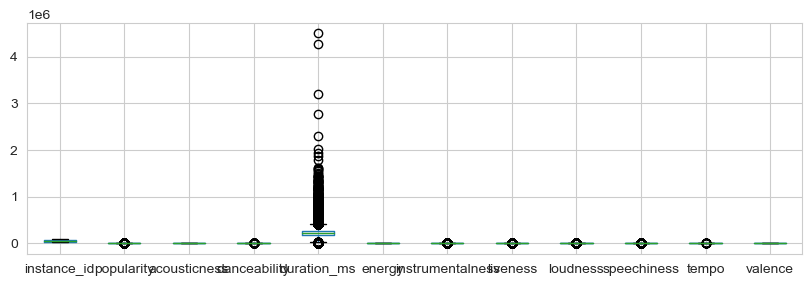

In [55]:
plt.figure(figsize=(10, 3))
df_dropped.select_dtypes(include=np.number).boxplot()
plt.show()

On observe des valeurs extrêmes pour la colonne `duration_ms`. On va donc la normaliser en la passant en secondes.

In [56]:
df_dropped["duration_ms"] = df_dropped["duration_ms"] / 1000

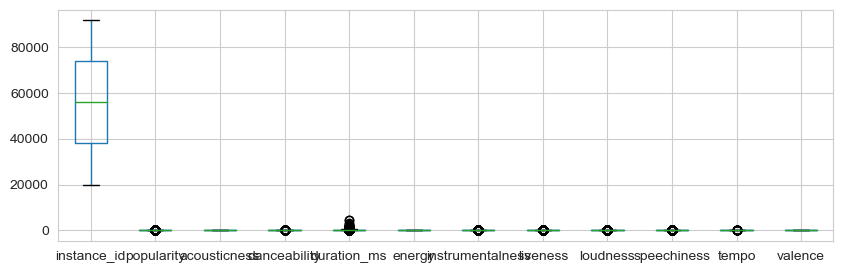

In [57]:
plt.figure(figsize=(10, 3))
df_dropped.select_dtypes(include=np.number).boxplot()
plt.show()

### Transformations des variables catégorielles en variables numériques

Afin de pouvoir utiliser les variables catégorielles dans notre modèle, on va les transformer en variables numériques.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder = LabelEncoder()
df_dropped['music_genre'] = encoder.fit_transform(df_dropped['music_genre'])

In [60]:
df_dropped['key'] = encoder.fit_transform(df_dropped['key'])
df_dropped['mode'] = encoder.fit_transform(df_dropped['mode'])
df_dropped['artist'] = encoder.fit_transform(df_dropped['artist_name'])

In [61]:
print(df_dropped['music_genre'].value_counts().sort_index())

music_genre
0    4495
1    4497
2    4470
3    4500
4    4486
5    4466
6    4520
7    4521
8    4504
9    4561
Name: count, dtype: int64


### Délétion des colonnes inutiles

In [63]:
df_dropped.drop(['track_name'],axis=1,inplace=True)

On suppose que le nom de la musique n'a pas d'impact sur le genre de musique.

In [64]:
df_dropped.drop(['instance_id'],axis=1,inplace=True)
df_dropped.drop(['obtained_date'],axis=1,inplace=True)

De la même manière, l'identifiant de la musique ainsi que la date d'obtention n'ont pas d'impact sur le genre de musique.

# Separation en train et test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_dropped.drop(columns=['music_genre'])
y = df_dropped['music_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)